In [1]:
pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
#from xgboost.xgbclassifier import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("http://bit.ly/w-data")
print("Shape of dataset: {}".format(data.shape))

Shape of dataset: (25, 2)


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Number of missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# information on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


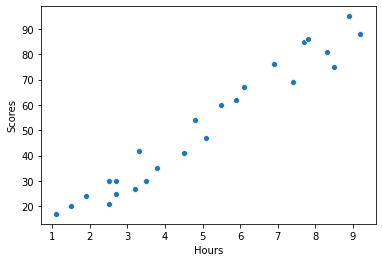

In [7]:
# data visualised using scatterplot. Linear dependents of both the variables can be clearly seen
sns.scatterplot(data['Hours'], data['Scores'])

In [8]:
# converting features into x and score to y
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)


In [9]:
# splitting the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)
print("y_train size: ", y_train.shape)
print("x_test size:", y_test.shape)

x_train size:  (17, 1)
x_test size:  (8, 1)
y_train size:  (17, 1)
x_test size: (8, 1)


In [10]:
# Initialising model and fitting train dataset
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Predicting scores using test dataset
y_hat1 = lr.predict(x_test)

mean squared error:  21.07614774916428


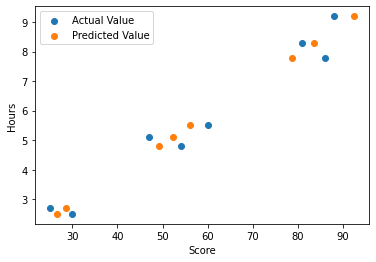

In [12]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat1))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat1, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

In [13]:
# tuning the model
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
rr=Ridge()
grid = GridSearchCV(rr, parameters,cv=4)

In [14]:
# model with the best alpha parameter to chosen and train datasets are fitted to the model
grid.fit(x_train, y_train)
best_model = grid.best_estimator_
best_model

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [15]:
# predicting score using test dataset
y_hat2 = best_model.predict(x_test)

mean squared error:  21.00537479593585


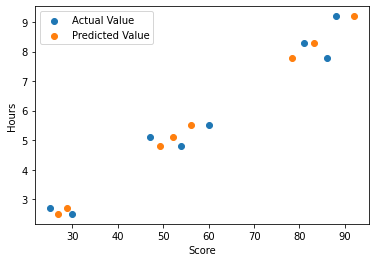

In [16]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat2))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat2, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

In [17]:
# Initialising the model and fitting train datasets to the model.
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train,y_train)

[07:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
# predicting scores using test dataset
y_hat3 = xgbr.predict(x_test)

mean squared error:  47.12291927125352


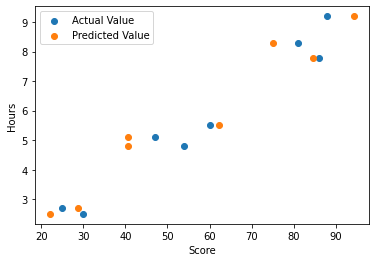

In [19]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat3))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat3, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

In [20]:
pd.DataFrame({"Model":['sklearn,LinearRigression', 'Ridge Regressior','Gradient Boost Regressor'],
             "Mean Squared Error":[mean_squared_error(y_test, y_hat1),
                                   mean_squared_error(y_test, y_hat2),
                                   mean_squared_error(y_test, y_hat3)]})

,Model,Mean Squared Error
0,"sklearn,LinearRigression",21.076148
1,Ridge Regressior,21.005375
2,Gradient Boost Regressor,47.122919


In [21]:
result = best_model.predict(np.array(9.25).reshape(-1,1))
print("Score of a student who studies 9.25 hours a day: {}%".format(round(result[0][0], 1)))

Score of a student who studies 9.25 hours a day: 92.5%


In this task we have predicted the percentage of marks a student is expected to score based upon the amount of time they spend for studying. We have test three models for accuracy; among the three models we found that Ridge Regressior and Linear Regressor have similar accuracy with Rigde Regressor having the least value of MSE. Whereas XGB Regressor have showed greater error while predicting. XGB Models are more sophesticated and advanced than the other two, it is used main for big datasets. Therefore XGB models are model recomended for this project the available datas are very small in number.

